# Case 3: User KGI 04

## Import Dependencies

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
import xgboost as xgb

## Data Loading

In [2]:
PATH = './Dataset/MiningProcess_Flotation_Plant_Database.csv'

df = pd.read_csv(PATH, parse_dates=['date'])
print("Dataset loaded successfully!")

Dataset loaded successfully!


## Basic Data Exploration

In [3]:
print("\n--- Data Exploration ---")
print(f"Dataset Shape: {df.shape}")
print("First 5 rows:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Missing Values Percentage:")
print((missing_values / len(df)) * 100)


--- Data Exploration ---
Dataset Shape: (737453, 24)
First 5 rows:
                 date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0 2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1 2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2 2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3 2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4 2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Ai

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  object        
 2   % Silica Feed                 737453 non-null  object        
 3   Starch Flow                   737453 non-null  object        
 4   Amina Flow                    737453 non-null  object        
 5   Ore Pulp Flow                 737453 non-null  object        
 6   Ore Pulp pH                   737453 non-null  object        
 7   Ore Pulp Density              737453 non-null  object        
 8   Flotation Column 01 Air Flow  737453 non-null  object        
 9   Flotation Column 02 Air Flow  737453 non-null  object        
 10  Flotation Column 03 Air Flow  737453 non-null  object        
 11  Flotation Col

In [5]:
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


## Data Formatting

In [6]:
def convert_comma_decimal(df):
    object_cols = df.select_dtypes(include=['object']).columns
    
    for col in object_cols:
        df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
    
    return df

df = convert_comma_decimal(df)

## Data Visualization


--- Data Visualization ---


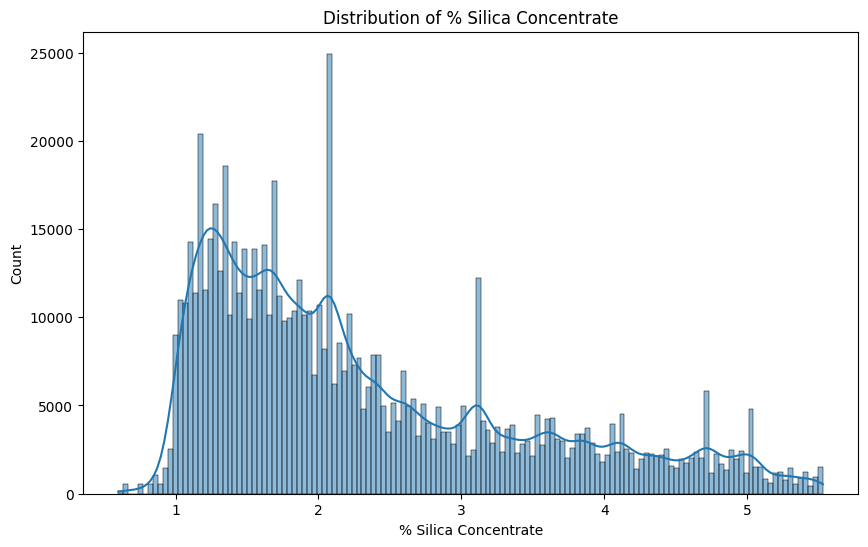

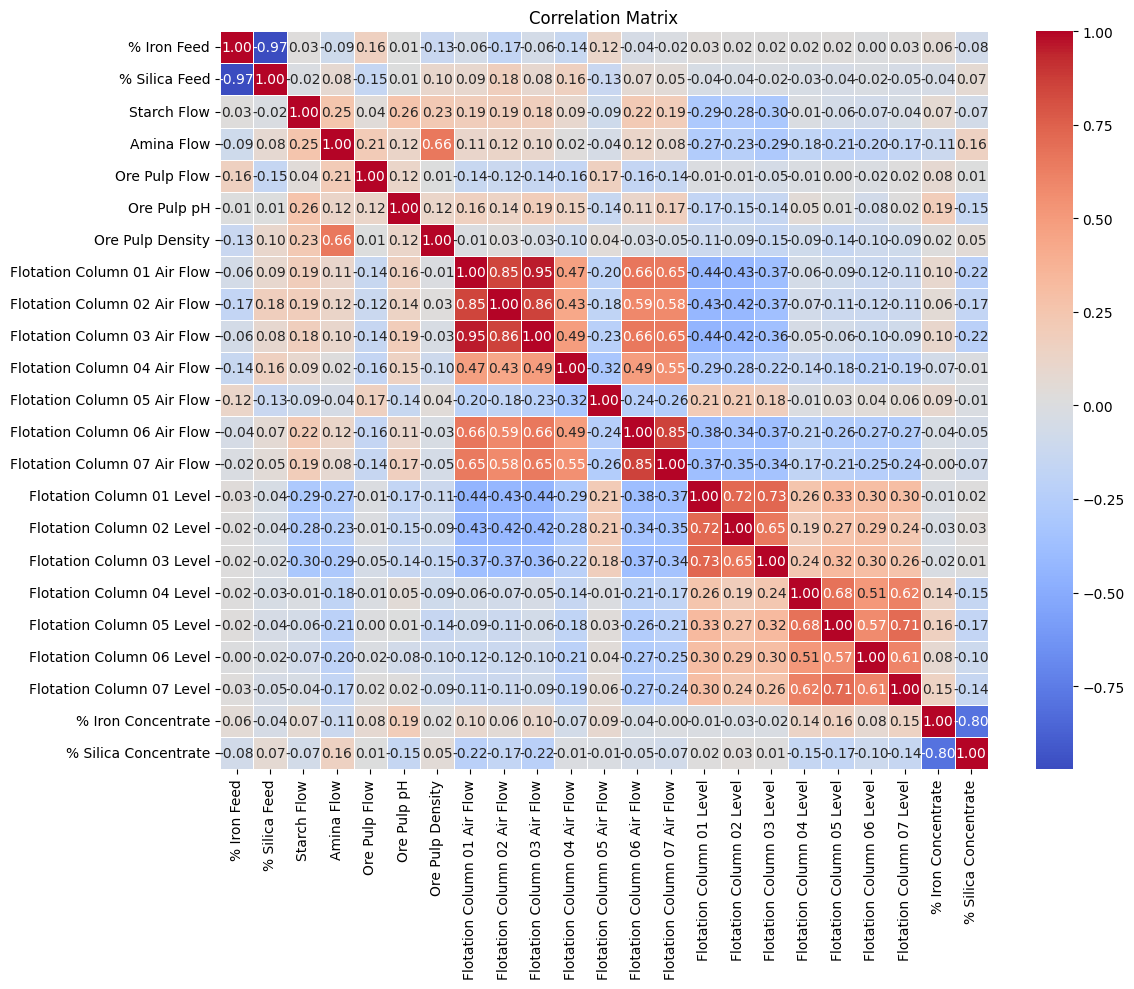

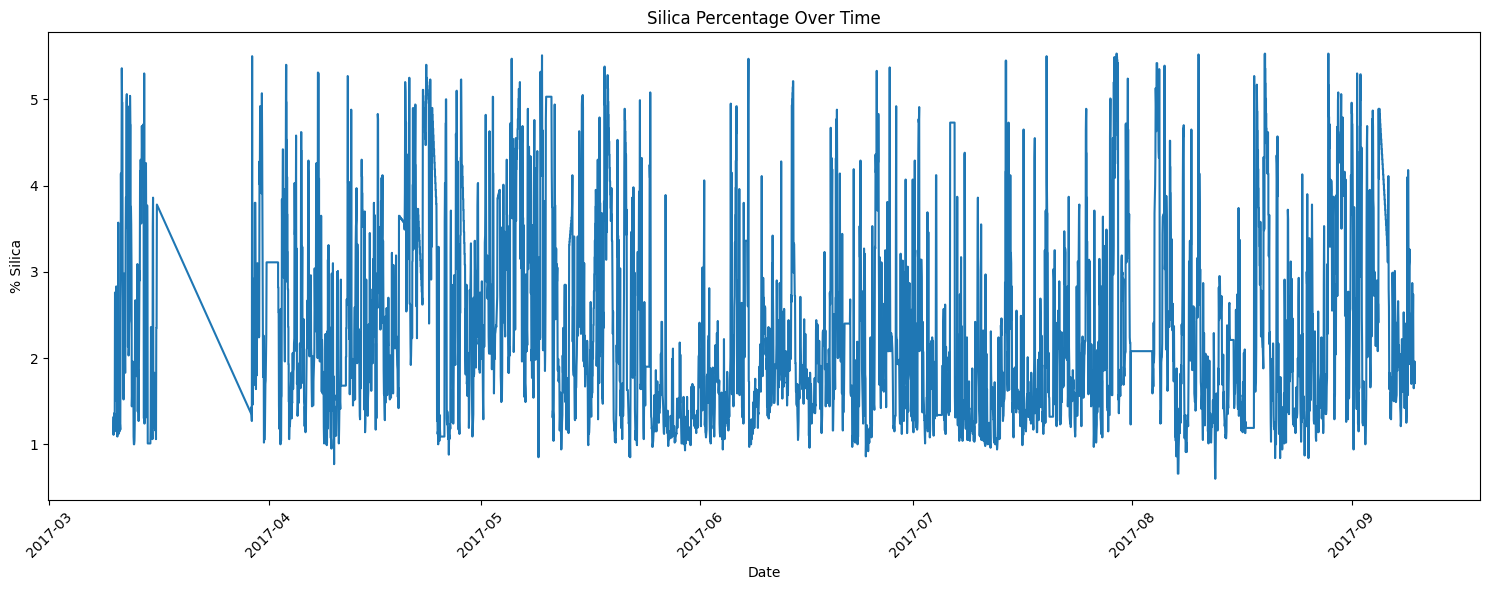

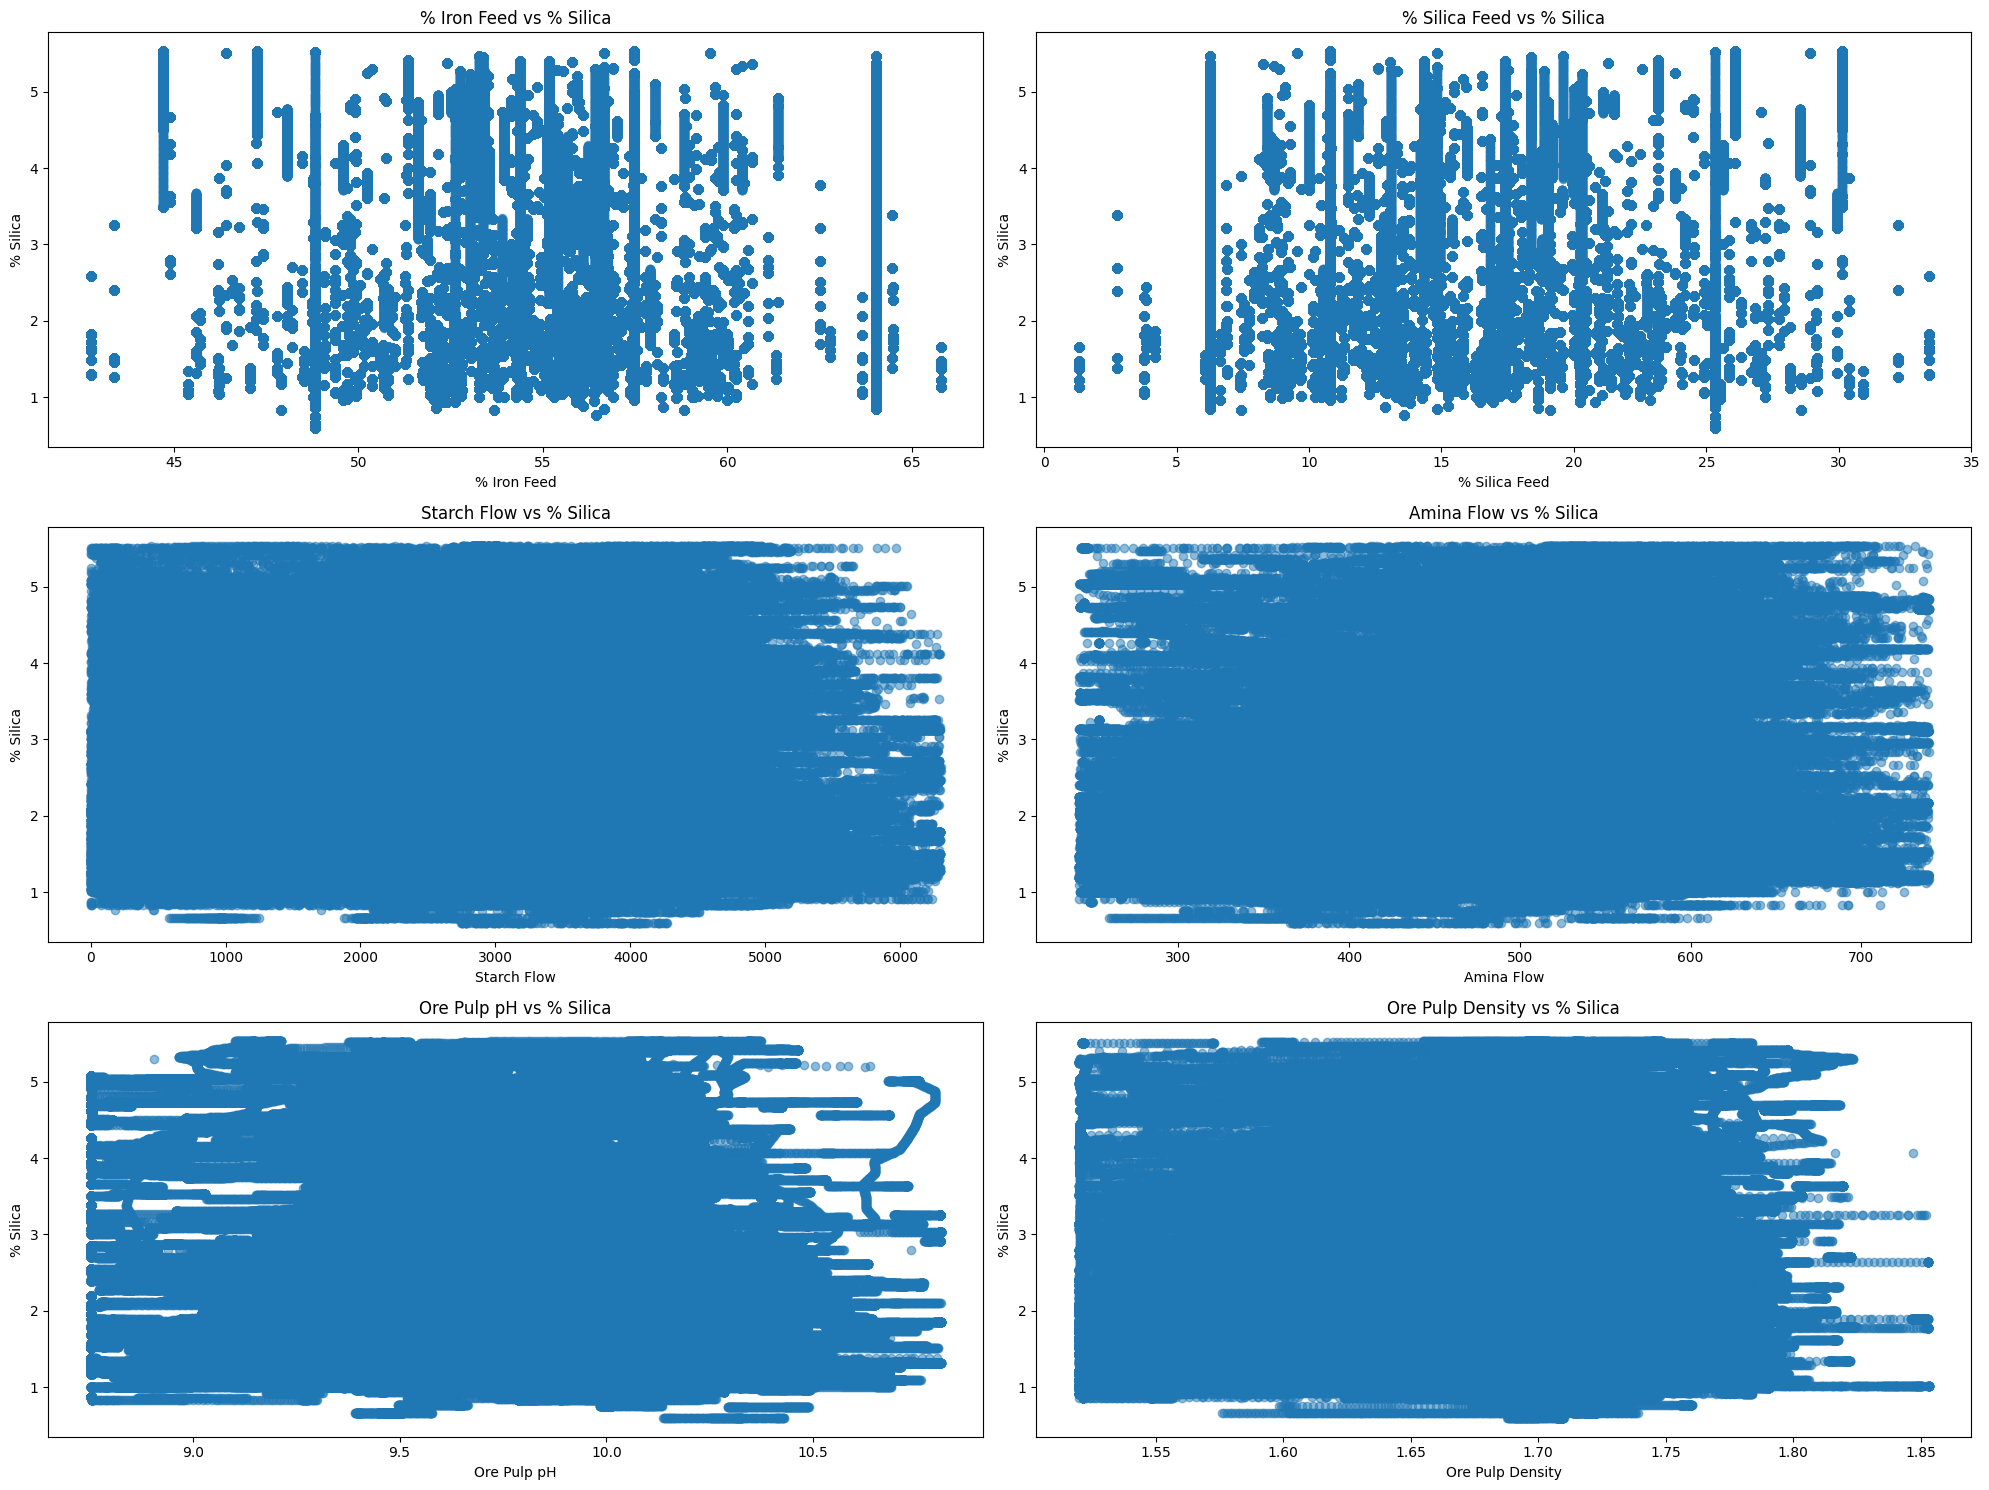

In [7]:
print("\n--- Data Visualization ---")

plt.figure(figsize=(10, 6))
sns.histplot(df['% Silica Concentrate'].dropna(), kde=True)
plt.title('Distribution of % Silica Concentrate')
plt.savefig('silica_distribution.png')

plt.figure(figsize=(12, 10))

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['% Silica Concentrate'])
plt.title('Silica Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('% Silica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('silica_time_series.png')

features_to_plot = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp pH', 'Ore Pulp Density']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, i+1)
    plt.scatter(df[feature], df['% Silica Concentrate'], alpha=0.5)
    plt.title(f'{feature} vs % Silica')
    plt.xlabel(feature)
    plt.ylabel('% Silica')

plt.tight_layout()
plt.savefig('feature_scatter_plots.png')

## Data Preprocessing

### Feature Engineering

In [8]:
print("\n--- Data Preprocessing ---")

print("\nPerforming feature engineering...")

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df['Iron_to_Silica_Feed_Ratio'] = df['% Iron Feed'] / df['% Silica Feed']
df['Starch_to_Amina_Ratio'] = df['Starch Flow'] / df['Amina Flow']
df['Air_Flow_Ratio'] = df['Flotation Column 01 Air Flow'] / df['Flotation Column 02 Air Flow']


df['Iron_Feed_Lag1'] = df['% Iron Feed'].shift(1)
df['Silica_Feed_Lag1'] = df['% Silica Feed'].shift(1)
df['pH_Lag1'] = df['Ore Pulp pH'].shift(1)

df = df.ffill().bfill()

print("Feature engineering completed.")
print(f"New dataset shape: {df.shape}")


--- Data Preprocessing ---

Performing feature engineering...
Feature engineering completed.
New dataset shape: (737453, 34)


### Outlier Handling

In [9]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


for column in df.select_dtypes(include=[np.number]).columns:
    if column != '% Silica Concentrate':
        outliers = detect_outliers(df, column)
        print(f"Outliers in {column}: {len(outliers)}")


def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  
    upper_bound = Q3 + 3 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


for column in df.select_dtypes(include=[np.number]).columns:
    if column != '% Silica Concentrate':  
        df = handle_outliers(df, column)

print("Extreme outliers handled using capping")

Outliers in % Iron Feed: 0
Outliers in % Silica Feed: 0
Outliers in Starch Flow: 1137
Outliers in Amina Flow: 8627
Outliers in Ore Pulp Flow: 109043
Outliers in Ore Pulp pH: 11002
Outliers in Ore Pulp Density: 43058
Outliers in Flotation Column 01 Air Flow: 0
Outliers in Flotation Column 02 Air Flow: 0
Outliers in Flotation Column 03 Air Flow: 33
Outliers in Flotation Column 04 Air Flow: 54191
Outliers in Flotation Column 05 Air Flow: 29474
Outliers in Flotation Column 06 Air Flow: 9432
Outliers in Flotation Column 07 Air Flow: 276
Outliers in Flotation Column 01 Level: 854
Outliers in Flotation Column 02 Level: 1564
Outliers in Flotation Column 03 Level: 531
Outliers in Flotation Column 04 Level: 462
Outliers in Flotation Column 05 Level: 236
Outliers in Flotation Column 06 Level: 2740
Outliers in Flotation Column 07 Level: 467
Outliers in % Iron Concentrate: 1590
Outliers in year: 0
Outliers in month: 0
Outliers in day: 0
Outliers in hour: 0
Outliers in Iron_to_Silica_Feed_Ratio: 648

### Data Split

In [10]:
X = df.drop(['% Silica Concentrate', 'date'], axis=1)
y = df['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Train set: (589962, 32), Test set: (147491, 32)


## Model Building and Evaluation

In [ ]:
print("\n--- Model Building and Training ---")


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):

    model.fit(X_train, y_train)
    

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    

    print(f"\n{model_name} Performance:")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    

    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    cv_rmse = cross_val_score(model, X, y, cv=5, scoring=make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False))

    print(f"Cross-Validation R² Scores: {cv_r2}")
    print(f"Mean CV R²: {cv_r2.mean():.2f}")
    print(f"Mean CV MAE: {-cv_mae.mean():.2f}")
    print(f"Mean CV RMSE: {-cv_rmse.mean():.2f}")
    
    return model, y_test_pred, test_rmse, test_r2, test_mae


model_performances = {}


lr_model = LinearRegression()
lr_model, lr_pred, lr_rmse, lr_r2, lr_mae = evaluate_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression"
)
model_performances['Linear Regression'] = {'RMSE': lr_rmse, 'R²': lr_r2, 'MAE': lr_mae, 'predictions': lr_pred}


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model, rf_pred, rf_rmse, rf_r2, rf_mae = evaluate_model(
    rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest"
)
model_performances['Random Forest'] = {'RMSE': rf_rmse, 'R²': rf_r2, 'MAE': rf_mae, 'predictions': rf_pred}


xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model, xgb_pred, xgb_rmse, xgb_r2, xgb_mae = evaluate_model(
    xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost"
)
model_performances['XGBoost'] = {'RMSE': xgb_rmse, 'R²': xgb_r2, 'MAE': xgb_mae, 'predictions': xgb_pred}


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model, gb_pred, gb_rmse, gb_r2, gb_mae = evaluate_model(
    gb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting"
)
model_performances['Gradient Boosting'] = {'RMSE': gb_rmse, 'R²': gb_r2, 'MAE': gb_mae, 'predictions': gb_pred}

best_model_name = min(model_performances, key=lambda k: model_performances[k]['RMSE'])
print(f"\nBest model based on Test RMSE: {best_model_name}")
print(f"Test RMSE: {model_performances[best_model_name]['RMSE']:.4f}")
print(f"Test R²: {model_performances[best_model_name]['R²']:.4f}")
print(f"Test MAE: {model_performances[best_model_name]['MAE']:.4f}")


--- Model Building and Training ---

Linear Regression Performance:
Train RMSE: 0.6284
Test RMSE: 0.6269
Train R²: 0.6885
Test R²: 0.6890
Train MAE: 0.4826
Test MAE: 0.4818
Cross-Validation R² Scores: [0.65749656 0.65724411 0.45776094 0.62541446 0.61065943]
Mean CV R²: 0.60
Mean CV MAE: 0.53
Mean CV RMSE: 0.68
